# Misura della massa delle particelle $J/\psi$ e $\psi^\prime$

I dati che seguono sono ottenuti dall'esperimento [CMS](https://cms.cern/) al [Large Hadron Collider](https://home.cern/science/accelerators/large-hadron-collider) del [CERN](https://home.cern/).

I dati sono su GitHib in [```cms-opendata-education```](https://github.com/cms-opendata-education).

L'esercizio consiste nella misura della massa e del numero di eventi di segnale della particella $\mathrm{J}/\psi$ e $\psi(2S)$ con i dati nel Run 2011-A dell'esperimento.

La $\mathrm{J}/\psi$ fu scoperta negli anni '70 e portò al premio nobel B. Richter e S.C.C. Ting nel 1976. Oggi viene prodotta di routine negli esperimenti ed è usata, tra l'altro,  come strumento di calibrazione dei rivelatori.

È possibile scegliere un metodo di fit *binned* o *unbinned*.

<span style="color:blue">Va notato che la distribuzione di massa non è esattamente gaussiana, ma asimmetrica, con una coda a sinistra. Dopo aver completato l'esercizio con modelli di picchi gaussiani, è possibile provare la funzione [```crystalball```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.crystalball.html). </span>

<span style="color:blue">Questa funzione prende il nome dal rivelatore *Crystal Ball* utilizzato nel laboratorio SLAC (Stanford Linear Accelerator Center) alla fine degli anni '70 del secolo scorso che ha portato alla scoperta del mesone $\eta_{\mathrm{c}}$. Il rivelatore è stato successivamente riutilizzato per altri esperimenti in Europa e in USA.
</span>

Per verificare se la misura ottenuta torni con le stime attuali, si può consultare la  [The Review of Particle Physics](https://pdg.lbl.gov/) del Particle Data Group.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wget
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [3]:
wget.download('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-english/master/Data/Jpsimumu_Run2011A.csv', 'data')

'data/Jpsimumu_Run2011A (1).csv'

In [4]:
df = pd.read_csv('data/Jpsimumu_Run2011A.csv')

In [16]:
df

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,75206813,G,10.16230,0.476262,-8.516420,5.52306,8.52973,0.609133,-1.514930,...,G,19.77540,2.750800,-13.987100,13.705900,14.255000,0.853872,-1.376610,1,3.11319
1,165617,75678475,G,15.87990,15.061800,-1.665810,-4.74643,15.15360,-0.308313,-0.110151,...,G,11.93380,11.908400,-0.767017,-0.085117,11.933000,-0.007133,-0.064321,-1,4.11735
2,165617,74428554,G,21.82790,-6.221380,11.084500,17.74470,12.71110,1.135660,2.082250,...,G,36.65130,-10.687400,15.069200,31.654400,18.474300,1.307610,2.187680,1,3.10098
3,165617,75193169,G,19.49230,2.761250,-5.576860,-18.47190,6.22301,-1.808380,-1.111050,...,G,14.93340,1.552490,-6.125350,-13.530200,6.319020,-1.505050,-1.322570,-1,2.33329
4,165617,74832715,G,8.09718,4.612670,-1.838860,6.39492,4.96570,1.071000,-0.379345,...,T,3.51313,-0.530458,0.688020,3.402380,0.868767,2.074220,2.227600,1,4.56326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31887,173236,276909077,G,5.15453,-1.030290,0.738169,4.99516,1.26743,2.080340,2.519900,...,G,8.25130,0.367105,-1.937720,8.011450,1.972180,2.109690,-1.383560,-1,2.94376
31888,173236,277042853,G,21.43870,18.934700,-9.954680,-1.41064,21.39200,-0.065895,-0.484025,...,T,14.07510,12.125800,-6.453710,-3.067970,13.736300,-0.221531,-0.489098,1,2.68074
31889,173236,277129302,G,24.96110,14.992100,5.964800,-19.04470,16.13520,-1.003310,0.378662,...,G,14.70800,7.981580,2.370750,-12.123800,8.326220,-1.170160,0.288728,1,2.20961
31890,173236,277315790,G,10.45480,-0.553466,-8.921930,-5.42080,8.93908,-0.574318,-1.632750,...,G,24.99120,2.722910,-19.706700,-15.125500,19.893900,-0.701373,-1.433490,1,3.15683


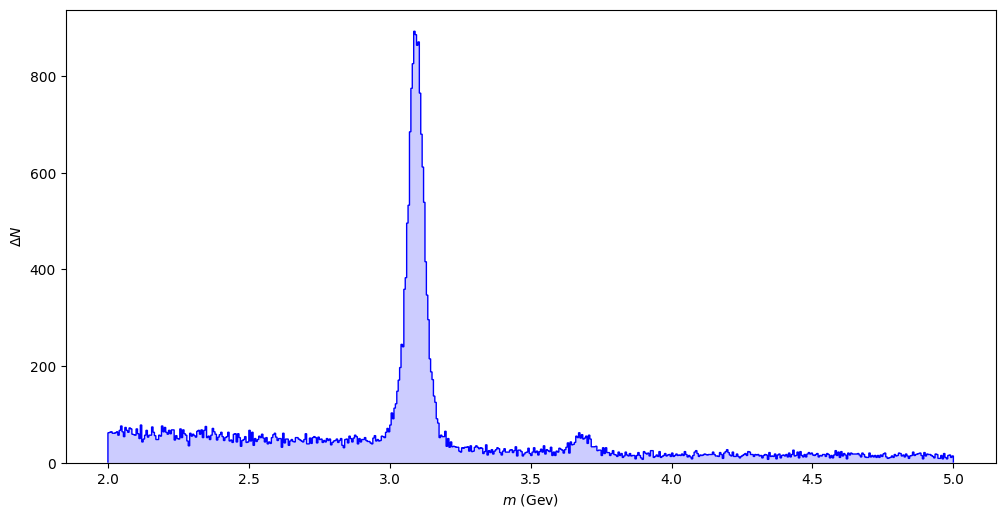

In [17]:
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
n_bins = 600
x_range = (2.0, 5.0)
data_y, bins, patches = ax.hist(df.M, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=1, label='histogram')
ax.hist(df.M, n_bins, range=x_range, density=False, color='b', alpha=0.2)
plt.xlabel(r'$m$ (Gev)')
plt.ylabel(r'$\Delta N$')
plt.show()